In [2]:
import os
import glob

import cv2
import matplotlib.pyplot as plt
import tqdm

CASCADE_PATH = './opencv/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(CASCADE_PATH)


class DetectFace:
    
    def __init__(self, image_path):
        self.img_path = image_path

    @property
    def image_name(self):
        return os.path.basename(self.img_path).split('.')[0]
        
    def detect_faces(self):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 3)
        return img, faces
    
    def show(self, ax, detected=True):
        img, faces = self.detect_faces()
        if detected:
            for (x, y, w, h) in faces:
                cv2.rectangle(img=img, pt1=(x, y), pt2=(x+w, y+h), color=(0, 0, 255), thickness=3)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(self.image_name)
    
    def output_faces(self, dir_path):
        img, faces = self.detect_faces()
        for idx, (x, y, w, h) in enumerate(faces):
            os.makedirs(dir_path, exist_ok=True)
            output_path = f'{dir_path}/{self.image_name}_{idx+1}.jpg'
            cv2.imwrite(output_path, img[y:y+h, x:x+w])

In [3]:
# 全画像の顔を検出して出力
IMAGE_ROOT = './images'
image_paths = glob.glob(f'{IMAGE_ROOT}/**/*.*', recursive=True)

for idx, image_path in enumerate(tqdm.tqdm(image_paths)):
    detect = DetectFace(image_path)
    dir_path = os.path.dirname(image_path).replace('/images/', '/images_faces/')
    
    if os.path.exists(f'{dir_path}/{detect.image_name}_1.jpg'):
        # すでに出力済だったらスキップ
        continue

    detect.output_faces(dir_path)

100% 626/626 [13:08<00:00,  1.26s/it]


  3% 20/626 [00:20<10:06,  1.00s/it]


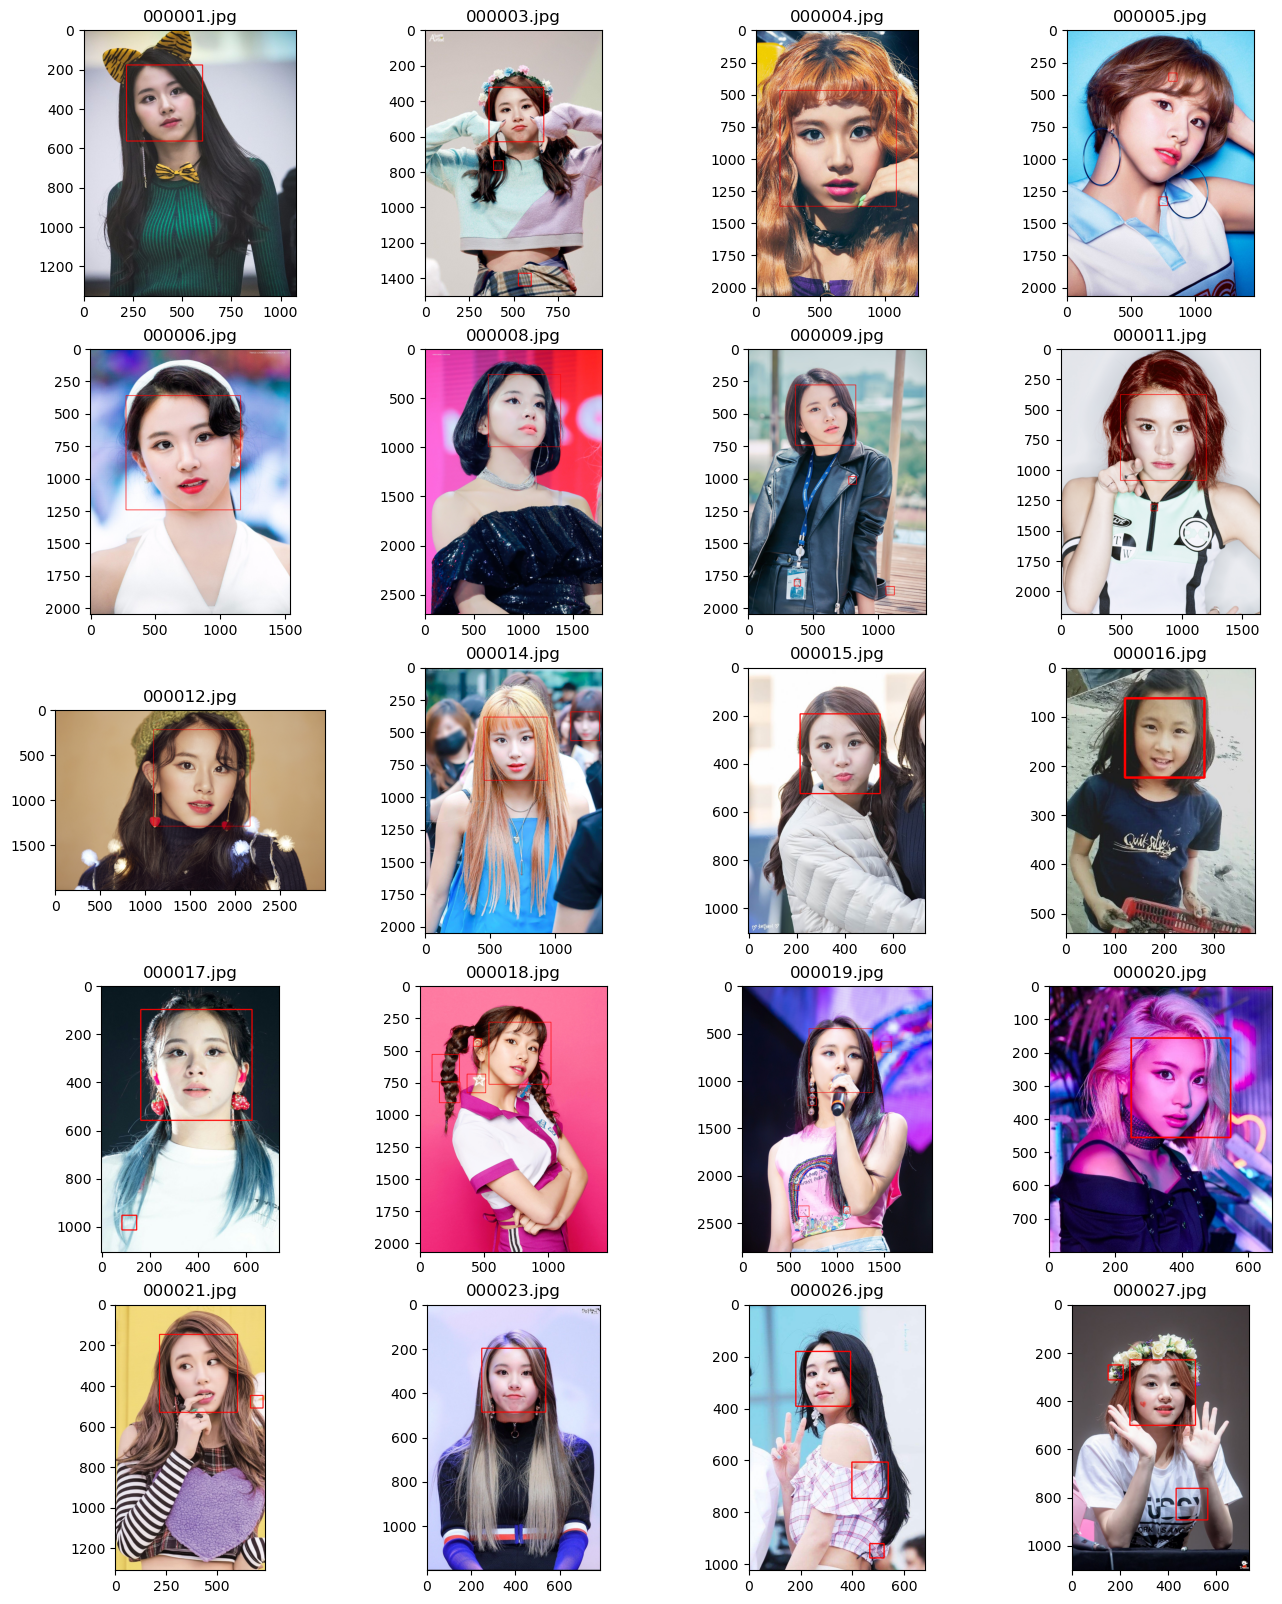

In [45]:
IMAGE_ROOT = './images'
image_paths = glob.glob(f'{IMAGE_ROOT}/**/*.*', recursive=True)

TEMP_NUM = 20
COL_NUM = 4
ROW_NUM = TEMP_NUM // COL_NUM if TEMP_NUM % COL_NUM == 0 else TEMP_NUM // COL_NUM + 1
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(4*COL_NUM, 4*ROW_NUM))
axes = axes.flatten()

for idx, image_path in enumerate(tqdm.tqdm(image_paths)):
    if idx >= TEMP_NUM:
        break
        
    detect = DetectFace(image_path)
    detect.show(ax=axes[idx])